In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from scipy.stats import mode

Could not save font_manager cache [Errno 13] Permission denied: 'C:\\Users\\91720\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


In [2]:
# Load MNIST dataset using idx2numpy
train_images = idx2numpy.convert_from_file("mnist/train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file("mnist/train-labels.idx1-ubyte")
test_images = idx2numpy.convert_from_file("mnist/t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("mnist/t10k-labels.idx1-ubyte")

In [3]:
# Combine train and test for unsupervised clustering
X = np.concatenate((train_images, test_images), axis=0)
y = np.concatenate((train_labels, test_labels), axis=0)

In [4]:
# Flatten images from 28x28 to 784
X = X.reshape((X.shape[0], -1))

# Normalize
X = X / 255.0

In [5]:
# Apply K-Means clustering
k = 10  # 10 clusters for digits 0–9
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

In [6]:
# Map clusters to true labels
def map_clusters_to_labels(clusters, true_labels):
    label_map = np.zeros(10, dtype=int)
    for i in range(10):
        mask = (clusters == i)
        if np.any(mask):
            label_map[i] = mode(true_labels[mask], keepdims=True).mode[0]
    return label_map

label_map = map_clusters_to_labels(clusters, y)
predicted_labels = np.array([label_map[c] for c in clusters])

In [7]:
# %%
# Evaluation
accuracy = accuracy_score(y, predicted_labels)
print(f"Clustering Accuracy (after label mapping): {accuracy:.2f}")

Clustering Accuracy (after label mapping): 0.58


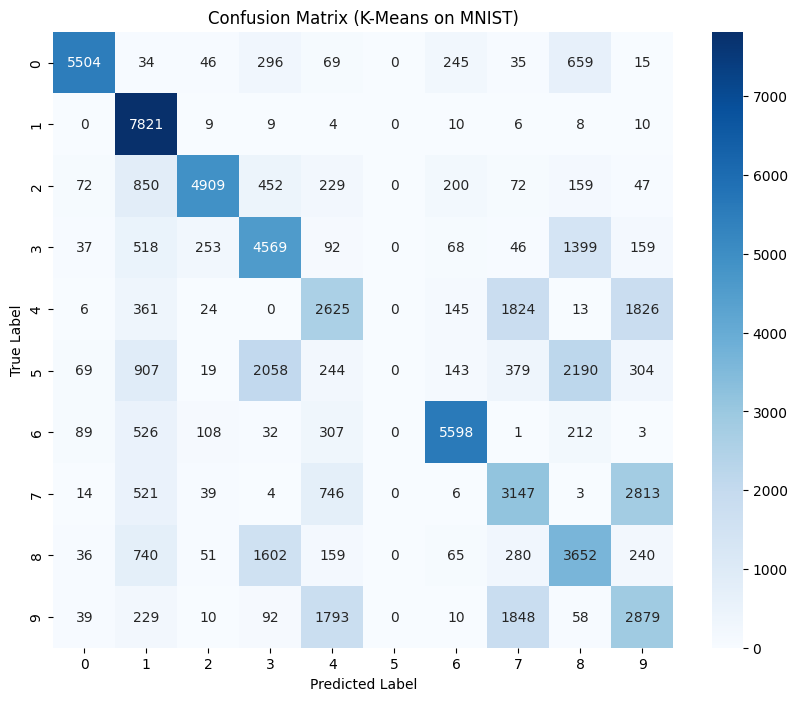

In [8]:
#Confusion matrix
conf_mat = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (K-Means on MNIST)")
plt.show()

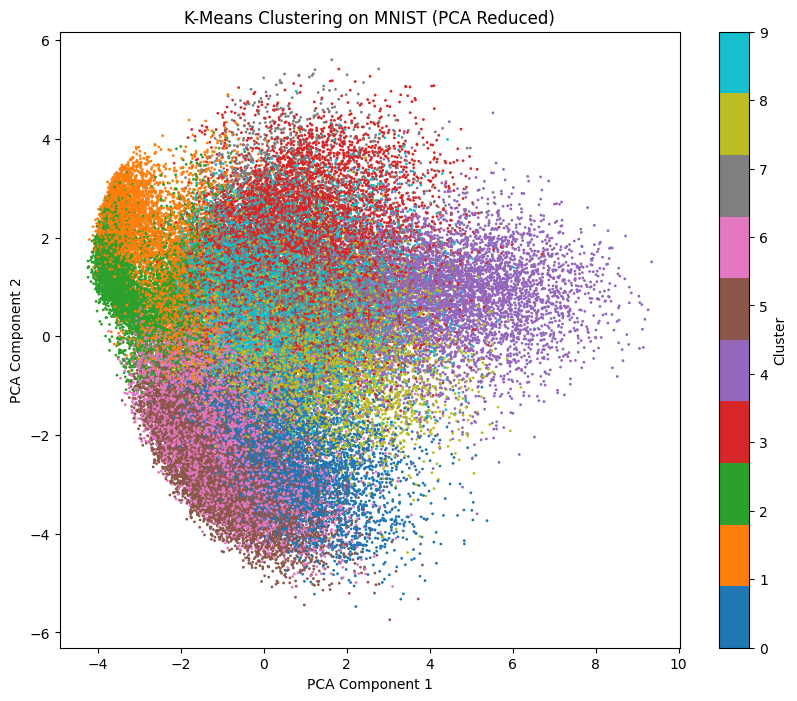

In [9]:
# Visualize clusters in 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=1)
plt.title("K-Means Clustering on MNIST (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()